In [1]:
import numpy as np
import sympy as sym
import scipy
import matplotlib.pyplot as plt

Now we shall move to LU decomposition. LU, like QR, is one of the computational back‐bones  underlying  data-science  algorithms,  including  least  squares  model  fitting  and the matrix inverse.
The  thing  about  LU  decomposition  is  you  cannot  simply  learn  it  immediately. Instead,  you  first  need  to  learn  about  systems  of  equations,  row  reduction,  and Gaussian  elimination.  And  in  the  course  of  learning  those  topics,  you’ll  also  learn about echelon matrices and permutation matrices.

### System of Equations
To  understand  LU  decomposition  and  its  applications,  you  need  to  understand  row reduction  and  Gaussian  elimination.  And  to  understand  those  topics,  you  need  to understand  how  to  manipulate  equations,  convert  them  into  a  matrix  equation,  and solve that matrix equation using row reduction.<br>
Let’s start with a “system” of one equation:
$$2x = 8 $$<br>
You can do various mathematical manipulations to the  equation as  long  as  you  do  the  same  thing  to  both  sides  of  the  equation.  That means  that  the  following  equation  is  not  the  same  as  the  previous  one,  but  they  are related to each other by simple manipulations. More importantly, any solution to one solution is a solution to the other:<br>
$$ 5(2x-3) = 5(8-3) $$
Now let’s move to a system of two equations:
$$ x = 4 - y$$
$$ y = x/2 + 2$$
In  this  system  of  equations,  it  is  impossible  to  solve  for  unique  values  of  x  and  y from  either  of  those  equations  alone.  Instead,  you  need  to  consider  both  equations simultaneously to derive the solution. If you try to solve that system now, you would probably  take  the  strategy  of  substituting  y  in  the  first  equation  with  the  right handside  of  the  second  equation.  After  solving  for  x  in  the  first  equation,  you  plug  that value into the second equation to solve for y. This strategy is similar to (though not as efficient as)<b> back substitution</b>.<br>
An  important  feature  of  a  system  of  equations  is  that  you  can  add  or  subtract individual  equations  to  each  other.  In  the  following  equations,  I’ve  added  two  times the  second  equation  to  the  first  and  subtracted  the  first  original  equation  from  the second (parentheses added for clarity):<br>
$$ x + (2y) = 4 - y + (x + 4)$$
$$ y − (x) = x/2 + 2 − (4 − y)$$
the  upshot  is  that  x  drops  out  of  the first  equation  while  y  drops  out  of  the  second  equation.  That  makes  the  solution much easier to calculate (x = 4/3, y = 8/3).<br><br>
Here’s the important point:<b> scalar multiplying  equations  and  adding  them  to  other  equations  made  the  solution  to  the  system easier to find. Again, the modulated and original systems are not the same equations,but  their  solutions  are  the  same  because  the  two  systems  are  linked  by  a  series  of linear operations.</b>

### Converting Equations into Matrices
Translating equations into matrices is conceptually simple, and involves two steps:-
1. Organize  the  equations  so  that  the  constants  are  on  the  right-hand  side  of  the equations. The constants are the numbers that are unattached to the variables (sometimes  called  intercepts  or  offsets).  The  variables  and  their  multiplying  coefficients are on  the  left-hand  side  of  the  equation,  in  the  same  order  (e.g.,  all  equations  should have  the  x  term  first,  then  the  y  term,  and  so  on).  The  following  equations  form  the system of equations we’ve been working with, in the proper organization:<br>$$ x + y = 4$$ $$ -x/2 + y = 2 $$
2. Second,  separate  the  coefficients  (the  numbers  multiplying  the  variables;  variables that  are  missing  from  an  equation  have  a  coefficient  of  zero)  into  a  matrix  with  one row per equation. The variables are placed into a column vector that right-multiplies the  coefficients  matrix.  And  the  constants  are  placed  into  a  column  vector  on  the right-hand side of the equation. Our example system has a matrix equation that looks like this:$$ \begin{bmatrix}1 & 1 \\ -1/2 & 1\end{bmatrix}\begin{bmatrix}x \\ y \end{bmatrix} = \begin{bmatrix} 4 \\ 2\end{bmatrix}$$<br><br>
And voilà! You’ve converted a system of equations into one matrix equation. We can refer to this equation as <b>Ax=b</b>, where A is the matrix of coefficients, x is a vector of unknown variables to solve for (in this case, x is the vector comprising $[x y]$), and b is a vector of constants.

### Working with Matrix Equations
You  can  manipulate  matrix  equations  just  like  normal  equations,  including  adding, multiplying,  transposing,  etc.,  as  long  as  the  manipulations  are  valid  (e.g.,  matrix sizes match for addition) and all manipulations affect both sides of the equation. For example, the following progression of equations is valid:
$$
Ax = b
$$
$$
v + Ax = v + b
$$
$$
(v + Ax)^T = (v + b)^T
$$
The main difference between working with matrix equations versus scalar equations is that because matrix multiplication is side-dependent, you must multiply matrices in the same way on both sides of the equation.
$$
AX = B
$$
$$
CAX = CB
$$
Notice  that  C  premultiplies  both  sides  of  the  equation.  In  contrast,  the  following progression is not valid:
$$
AX = B
$$
$$
CAX = BC
$$
The  problem  here  is  that  C post multiplies  in  the  left-hand  side  but  pre multiplies in  the  right-hand  side.  To  be  sure,  there  will  be  a  few  exceptional  cases  where  that equation  is  valid  (e.g.  if  C  is  the  identity  or  zeros  matrix),  but  in  general,  that progression is not valid.
<br><br>
We  will  solve  for  the  unknown  matrix  X  in  the equation AX=B. The following code generates A and B from random numbers. You already know that we can solve for X by using $A^{−1}$. The question is whether the order of multiplication matters.<br><br>
#### If  matrix  multiplication  were  commutative  (meaning  that  the  order  doesn’t  matter), then res1 and res2 should both equal the zeros matrix. Let’s see:

In [2]:
A = np.random.randn(4,4)
B = np.random.randn(4,4)
# solve for X
X1 = np.linalg.inv(A) @ B
X2 = B @ np.linalg.inv(A)
# residual (should be zeros matrix)
res1 = A@X1 - B
res2 = A@X2 - B
print(np.round(res1,2))
print(np.round(res2,2))

[[-0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [-0.  0. -0.  0.]
 [-0. -0. -0. -0.]]
[[  1.2  -13.53   1.2   -5.94]
 [  1.14  -4.4    0.48  -1.2 ]
 [ -1.98   2.83  -0.44  -2.2 ]
 [ -2.37  16.08  -3.25   3.64]]


## Row Reduction
Row  reduction  means  iteratively  applying  two  operations scalar  multiplication  and addition to rows of a matrix. Row reduction relies on the same principle as adding equations to other equations within a system.<br>Memorize this statement: <b>The goal of row reduction is to transform a dense matrix into an upper-triangular matrix.</b>
$$
\begin{bmatrix}2 & 3\\ -2 & 2\end{bmatrix}\xrightarrow{\text{R2 = R1 + R2}} \begin{bmatrix}2 & 3\\ 0 & 5\end{bmatrix}
$$
#### The  upper-triangular  matrix  that  results  from  row  reduction  is  called  the  echelon form of the matrix.
### Formally,  a  matrix  is  in  echelon  form  if:<br>1.The  leftmost  nonzero  number  in  a  row(which is called the pivot) is to the right of the pivot of rows above. <br>2. Any rows of all zeros are below rows containing nonzeros.
Similar  to  manipulating  equations  in  a  system,  the  matrix  after  row  reduction  is different  from  the  matrix  before  row  reduction.  But  the  two  matrices  are  linked  by  a linear  transform.  And  because  linear  transforms  can  be  represented  by  matrices,  we can use matrix multiplication to express row reduction.<br>
I  will  call  that  matrix $L^{−1}$  for  reasons  that  will  become  clear  when  I  introduce  LU decomposition. Thus,  in   the  expression $L^{−1}A=U$,  $L^{−1}$  is   the  linear  transformation that  keeps  track  of    the  manipulations  we’ve  implemented  through  row  reduction.  For now, you don’t need to focus on $L^{−1}$ in fact, it’s often ignored during Gaussian elimination. But the key point (slightly expanded from an earlier claim) is this:<b><i> row reduction involves transforming a matrix into an upper-triangular matrix via row manipulations,which can be implemented as premultiplication by a transformation matrix.</b></i>
$$
\begin{bmatrix}1 & 2 & 2\\-1 & 3 & 0\\2 & 4 & -3\end{bmatrix}\xrightarrow{\text{-2R1 + R3}}\begin{bmatrix}1 & 2 & 2\\-1 & 3 & 0\\0 & 0 & -7\end{bmatrix}\xrightarrow{\text{R1 + R2}}\begin{bmatrix}1 & 2 & 2\\0 & 5 & 2\\0 & 0 & -7\end{bmatrix}
$$

### Gaussian Elimination
Solving  a  matrix  equation  without  inverting any matrices.This  technique  is  called  Gaussian  elimination.Gaussian  elimination  is  simple:  augment  the  matrix  of  coefficients  by  the  vector  of constants,  row  reduce  to  echelon  form,  and  then  use  back  substitution  to  solve  for each variable in turn.<br>
Let’s start with the system of two equations that we solved earlier:
$$ x = 4 - y$$ $$ y = x/2 + 2$$
The  first  step  is  to  convert  this  system  of  equations  into  a  matrix  equation.
$$ \begin{bmatrix}1 & 1 \\ -1/2 & 1\end{bmatrix}\begin{bmatrix}x \\ y \end{bmatrix} = \begin{bmatrix} 4 \\ 2\end{bmatrix}$$
<br>Next, we augment the coefficients matrix with the constants vector:
$$
\begin{bmatrix}1 & 1 & 4\\-1/2 & 1 & 2\end{bmatrix}
$$
Then  we  row  reduce  that  augmented  matrix.  Note  that  the  column  vector  of  constants will change during row reduction:
$$
\begin{bmatrix}1 & 1 & 4\\-1/2 & 1 & 2\end{bmatrix}\xrightarrow{\text{1/2R1 + R2}}\begin{bmatrix}1 & 1 & 4\\0 & 3/2 & 4\end{bmatrix}
$$
Once we have the matrix in its echelon form, we translate the augmented matrix back into a system of equations. That looks like this:
$$
x + y = 4
$$
$$
3/2y = 4
$$
Gaussian elimination via row reduction removed the x term in the second equation,which means that solving for y merely involves some arithmetic. Once you solve for y = 8/3, plug that value into y in the first equation and solve for x. This procedure is called back substitution.

### Gauss-Jordan Elimination
Let’s  keep  row  reducing  our  example  matrix  with  the  goal  of  turning  all  the  pivots the  leftmost  nonzero  numbers  in  each row into  1s.  Once  you  have  the  echelon matrix, you simply divide each row by its pivot. In this example, the first row already has a 1 in the leftmost position, so we just need to adjust the second row. That gives us the following matrix:
$$\begin{bmatrix}1 & 1 & 4\\0 & 1 & 8/3\end{bmatrix}$$
And now for the trick: <b>we continue row reducing upward to eliminate all the elements above each pivot. In other words, we want an echelon matrix in which each pivot is 1 and it’s the only nonzero number in its column.</b>
$$\begin{bmatrix}1 & 1 & 4\\0 & 1 & 8/3\end{bmatrix}\xrightarrow{\text{-R2 + R1}}\begin{bmatrix}1 & 0 & 4/3\\0 & 1 & 8/3\end{bmatrix}$$
That’s  the  RREF (Reduced Row Echelon Form) of  our  original  matrix.  You  can  see  the  identity  matrix  on  the  left. RREF  will  always  produce  an  identity  matrix  as  a  submatrix  in  the  upper-left  of the  original  matrix.  That’s  a  result  of  setting  all  pivots  to  1  and  using  upward  reduction to eliminate all elements above each pivot.<br>
Now  we  continue  with  Gaussian  elimination  by  translating  the  matrix  back  into  a system of equations:
$$
x = 4/3
$$
$$
y = 8/3
$$
We no longer need back substitution, or even basic arithmetic: the modified Gaussian elimination—which  is  called  Gauss-Jordan  elimination—decoupled  the  interwoven variables in the system of equations, and laid bare the solutions to each variable.<br>
The RREF is unique, meaning that a matrix has exactly one associated RREF. NumPy does  not  have  a  function  to  compute  the  RREF  of  a  matrix,  but  the  sympy  library does  (sympy  is  the  symbolic  math  library  in  Python  and  is  a  powerful  engine  for“chalkboard math”):

In [3]:
# the matrix converted to sympy
M = np.array([ [1,1,4],[-1/2,1,2] ])
symMat = sym.Matrix(M)
# RREF
symMat.rref()[0]

Matrix([
[1, 0, 1.33333333333333],
[0, 1, 2.66666666666667]])

### Matrix Inverse via Gauss-Jordan Elimination
The  key  insight  from  Gauss-Jordan  elimination  is  that  row  reduction  produces  asequence  of  row  manipulations  that  solves  a set  of  equations.  Those  row  manipulations are linear transformations.<br>
The description of Gauss-Jordan elimination is consistent with the description  of  the  matrix  inverse:  a  linear  transformation  that solves  a  set  of  equations.  But wait, what “system of equations” does the matrix inverse solve? A fresh perspective on the matrix inverse will provide some new insights. Consider this system of equations:
$$
ax_1 + by_1 = 1
$$
$$
cx_1 + dy_1 = 0
$$
Translated into a matrix equation, we get:
$$
\begin{bmatrix}a & b\\c & d\end{bmatrix}\begin{bmatrix}x_1\\y_1\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}
$$
Check  out  that  constants  vector—it  is  the  first  column  of  the  2 × 2  identity  matrix! That  means  that  applying  RREF  to  a  square  full-rank  matrix  augmented  by  the  first column  of  the  identity  matrix  will  reveal  the  linear  transformation  that  brings  the matrix  into  the  first  column  of  the  identity  matrix.  And  that  in  turn  means  that  the vector $[x_1 y_1]^T$ is the first column of the matrix inverse.<br>
We then repeat the procedure but solving for the second column of the inverse:
$$
ax_2 + by_2 = 0
$$
$$
cx_2 + dy_2 = 1
$$
RREF  on  that  system  gives  the  vector  $[x_2 y_2]^T$,  which  is  the  second  column  of  the matrix inverse.<br>
I’ve  separated  the  columns  of  the  identity  matrix  to  link  back  to  the  perspective  of solving systems of equations. But we can augment the entire identity matrix and solve for the inverse with one RREF.<br>
Here is the bird’s-eye view of obtaining the matrix inverse via Gauss-Jordan elimination  (the  square  brackets  indicate  augmented  matrices  with  the  vertical  line  separating the two constituent matrices):
$$
rref([ A | I ]) => [ I | A^{-1} ]
$$
This is interesting because it provides a mechanism for computing the matrix inverse without  computing  determinants.  On  the  other  hand,  row  reduction  does  involve  a lot  of  division,  which  increases  the  risk  of  numerical  precision  errors.

## LU Decomposition
<a id='lu_decomp'></a>
The “LU” in LU decomposition stands for “lower upper,” as in lower-triangular, upper-triangular.  The  idea  is  to  decompose  a  matrix  into  the  product  of  two  triangular matrices:
$$ A = LU$$
$$ A = P^TLU$$
$$ A^{-1} = (P^TLU)^{-1}$$
$$ A^{-1} = U^{-1}L^{-1}P$$
Here’s a numerical example:
$$
\begin{bmatrix}2 & 2 & 4\\1 & 0 & 3\\2 & 1 & 2\end{bmatrix} = \begin{bmatrix}1 & 0 & 0\\1/2 & 1 & 0\\1 & 1 & 1\end{bmatrix}\begin{bmatrix}2 & 2 & 4\\0 & -1 & 1\\0 & 0 & -3\end{bmatrix}
$$
And here’s the corresponding Python code (note that the function for LU decomposition is in the SciPy library):

In [4]:
A = np.array([ [2,2,4], [1,0,3], [2,1,2] ])
_,L,U = scipy.linalg.lu(A)
print(f'L: {L}')
print(f'U: {U}')

L: [[1.  0.  0. ]
 [0.5 1.  0. ]
 [1.  1.  1. ]]
U: [[ 2.  2.  4.]
 [ 0. -1.  1.]
 [ 0.  0. -3.]]


Row  reduction  can  be  expressed  as  $L^{−1}A=U$,  where  $L^{−1}$  contains  the  set  of  row manipulations that transforms the dense A into upper-triangular (echelon) U.<br>
Because the echelon form is not unique, LU decomposition is not necessarily unique.That is, there is an infinite pairing of lower- and upper-triangular matrices that could multiply  to  produce  matrix  A.  However,  adding  the  constraint  that  the  diagonals  of L  equal  1  ensures  that  LU  decomposition  is  unique  for  a  full-rank  square  matrix  A.<br>
The  uniqueness  of  LU  decompositions of reduced-rank and nonsquare matrices is a longer discussion that I will omit here;however, SciPy’s LU decomposition algorithm is determinstic, meaning that repeated LU decompositions of a given matrix will be identical.

### Row Swaps via Permutation Matrices
Some  matrices  do  not  easily  transform  into  an  upper-triangular  form.  Consider  the following matrix:
$$\begin{bmatrix}3 & 2 & 1\\0 & 0 & 5\\0 & 7 & 2\end{bmatrix}$$
It’s  not  in  echelon  form,  but  it  would  be  if  we  swapped  the  second  and  third  rows.Row  swaps  are  one  of  the  tricks  of  row  reduction,  and  are  implemented  through  a permutation matrix:
$$\begin{bmatrix}1 & 0 & 0\\0 & 0 & 1\\0 & 1 & 0\end{bmatrix}\begin{bmatrix}3 & 2 & 1\\0 & 0 & 5\\0 & 7 & 2\end{bmatrix} = \begin{bmatrix}3 & 2 & 1\\0 & 7 & 2\\0 & 0 & 5\end{bmatrix}$$
Permutation  matrices  are  often  labeled  P.  Thus,  the  full  LU  decomposition  actually takes the following form:
$$
PA = LU
$$
$$
A = P^TLU
$$
<b>Permutation  matrices  are  orthogonal,  and  so  $P^{−1}=PT$</b><br>
Briefly,  the reason  is  that  all  elements  of  a  permutation  matrix  are  either  0  or  1,  and  because rows are swapped only once, each column has exactly one nonzero element (indeed,all  permutation  matrices  are  identity  matrices  with  row  swaps).  Therefore,  the  dot product  of  any  two  columns  is  0  while  the  dot  product  of  a  column  with  itself  is  1,meaning $P^TP=I$.<br>
#### Important:  the  formulas written  above  provide  the  mathematical  description  of LU  decomposition.  Scipy  actually  returns  A=PLU,  which  we  could  also  write  as $P^TA=LU$

## Code Exercises

### Question 10-1. LU  decomposition  can  be  computationally  intensive,  although  it  is  more  efficient than  other  decompositions  such  as  QR.  Interestingly,  LU  decomposition  is  often used  as  a  benchmark  to  compare  computation  times  between  operating  systems,hardware  processors,  computer  languages  (e.g.,  C  versus  Python  versus  MATLAB),or  implementation  algorithms.  Out  of  curiousity,  I  tested  how  long  it  took  Python and MATLAB to run LU decomposition on a thousand matrices of size 100 × 100. On my laptop, MATLAB took around 300 ms while Python took around 410 ms. Python on Google Colab took around 1,000 ms. Test how long this takes on your computer.

In [5]:
import time

start = time.time()


for i in range(1000):
  A = np.random.randn(100,100)
  P,L,U = scipy.linalg.lu(A)

# stop the timer
end = time.time()
end - start

0.5164806842803955

### Question 10-2. Use  the  matrix-multiplication  method  to  make  a  6 × 8  rank-3  matrix.  Take  its  LU decomposition,  and  show  the  three  matrices  with  their  ranks  in  the  title,  as  in Figure  10-2.  Notice  the  ranks  of  the  three  matrices  and  that  L  has  all  1s  on  the diagonal. Feel free to explore the ranks of matrices with other sizes and ranks.
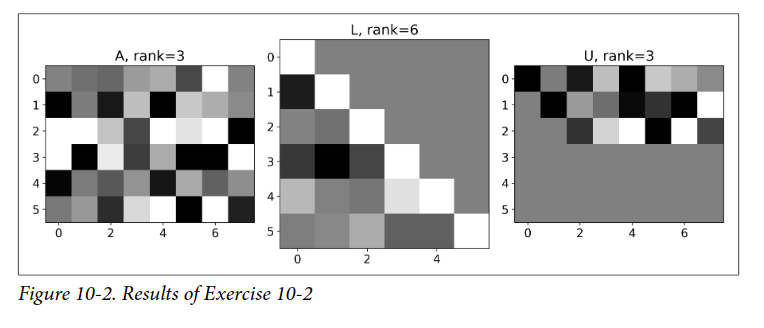

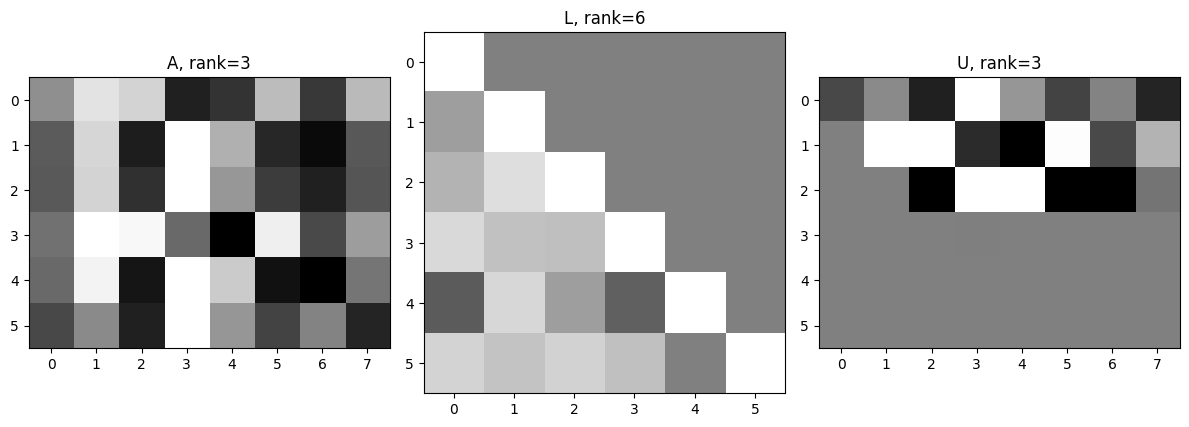

In [6]:
m = 6
n = 8
r = 3
A = np.random.randn(m,r)@np.random.randn(r,n)
P,L,U = scipy.linalg.lu(A)
# and plot
_,axs = plt.subplots(1,3,figsize=(12,7))

axs[0].imshow(A,vmin=-1,vmax=1,cmap='gray')
axs[0].set_title(f'A, rank={np.linalg.matrix_rank(A)}')

axs[1].imshow(L,vmin=-1,vmax=1,cmap='gray')
axs[1].set_title(f'L, rank={np.linalg.matrix_rank(L)}')

axs[2].imshow(U,vmin=-1,vmax=1,cmap='gray')
axs[2].set_title(f'U, rank={np.linalg.matrix_rank(U)}')

plt.tight_layout()
plt.show()

In [7]:
np.round(L,2)

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.24,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.41,  0.74,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.7 ,  0.51,  0.49,  1.  ,  0.  ,  0.  ],
       [-0.29,  0.68,  0.24, -0.25,  1.  ,  0.  ],
       [ 0.65,  0.53,  0.65,  0.5 ,  0.  ,  1.  ]])

### Question 10-3.One  application  of  LU  decomposition  is  computing  the  determinant.  Here  are  two properties of the determinant: the determinant of a triangular matrix is the product of  the  diagonals,  and  the  determinant  of  a  product  matrix  equals  the  product  of the determinants (that is, det(AB)=det(A)det(B)). Putting these two facts together, you  can  compute  the  determinant  of  a  matrix  as  the  product  of  the  diagonals  of  L times  the  product  of  the  diagonals  of  U.  On  the  other  hand,  because  the  diagonals of L are all 1 (when implemented in Python to ensure uniqueness of the decomposition),  then  the  determinant  of  a  matrix  A  is  simply  the  product  of  the  diagonals  of U. Try it in Python—and compare to the result of np.linalg.det(A) multiple times with different random matrices, before reading the next paragraph.<br>
### Did  you  get  the  same  result  as  Python?  I  assume  you  found  that  the  determinants match  in  magnitude  but  that  the  signs  would  seemingly  randomly  differ.  Why  did that  happen?  It  happened  because  I  omitted  the  permutation  matrix  in  the  instructions.  The  determinant  of  a  permutation  matrix  is  +1  for  an  even  number  of  row swaps  and  −1  for  an  odd  number  of  row  swaps.  Now  go  back  to  your  code  and include the determinant of P in your computations.


In [8]:
# a matrix and its det
M = 6
A = np.random.randn(M,M)

# LU
P,L,U = scipy.linalg.lu(A)

# determinant as the product of the diagonals of U
detLU = np.prod( np.diag(U) ) * np.linalg.det(P)

# check against the det function
detNP = np.linalg.det(A)

# compare
print(detLU,detNP)
print(detLU-detNP)

-3.1820950890949873 -3.1820950890949873
0.0


### Question 10-4.Following the formula from the section [“LU Decomposition”](#lu_decomp) , the inverse of a matrix can be expressed as:
$$ A = P^TLU$$
$$ A^{-1} = (P^TLU)^{-1}$$
$$ A^{-1} = U^{-1}L^{-1}P$$
### Implement  that  third  equation  directly  using  the  output  from  scipy.linalg.lu  on a  4 × 4  random-numbers  matrix.  Is  $AA^{−1}$  the  identity  matrix?  Sometimes  it  is  and sometimes it isn’t, depending on P. This discrepancy occurs because of what I wrote about  the  output  of  scipy.linalg.lu.  Adjust  the  code  so  that  it  follows  SciPy’sconvention instead of the math convention.

## Here is the take-home message from this exercise: the absence of error messages does not  necessarily  mean  your  code  is  correct.  Please  sanity-check  your  mathematical code as much as possible

In [9]:
# matrix sizes
m = 4
A = np.random.randn(m,m)

# LU decomposition
P,L,U = scipy.linalg.lu(A)

# inverse
invViaLU = np.linalg.inv(U) @ np.linalg.inv(L) @ P.T

# "regular" inverse
invViaInv = np.linalg.inv(A)

np.round( A@invViaLU ,10)

array([[ 1., -0., -0.,  0.],
       [ 0.,  1.,  0., -0.],
       [ 0., -0.,  1.,  0.],
       [-0., -0., -0.,  1.]])

### Question 10-5.For  matrix  A=PLU  (using  Python’s  ordering  of  the  permutation  matrix),  $A^TA$  can be  computed  as  $U^TL^TLU$ without  the  permutation  matrices.  Why  is  it  possible  to drop the permutation matrix? Answer the question and then confirm in Python using random matrices that $A^TA=U^TL^TLU$ even when P≠I.

# The reason is that writing out the equation leads to $P^tP$ in the middle, which is the identity matrix. 
# Conceptually, it means that any row swaps are undone when multiplying by the transpose.

In [10]:
# create a matrix
A = np.random.randn(4,4)

# LUP
P,L,U = scipy.linalg.lu(A)

# compute AtA via LU
AtA_lu = U.T @ L.T @ L @ U

# direct computation
AtA_direct = A.T @ A

# compare to direct computation
np.round( AtA_lu - AtA_direct ,10)

array([[ 0.,  0., -0.,  0.],
       [-0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0.]])